### Linear SVM soft margin

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [2]:
def get_hyperplane_value(x,a,b,c, offset=0):
    """
    Using standard line equation
    Ax+By+C=0
    """
    return (-c-a * x  + offset) / b

In [3]:
X, y =  datasets.make_blobs(n_samples=50, n_features=2, centers=2, cluster_std=1.05, random_state=40)
y = np.where(y == 0, -1, 1)
# y=y.reshape(-1, 1)

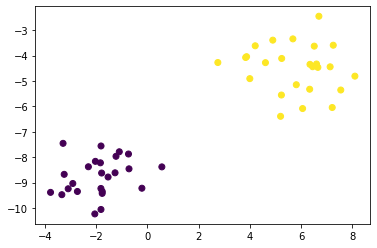

In [4]:
plt.scatter(X[:,0], X[:,1], c=y)

In [5]:
C=1000
w=np.random.rand(X.shape[1]).reshape(-1,1)
b=0
print('w shape:',w.shape)

w shape: (2, 1)


In [6]:
# loss[0][0]

In [7]:
# X=X3
# y=y3

losses=[]
learning_rate=0.001    
y=y.reshape(-1, 1)
C=1
w=np.random.rand(X.shape[1]).reshape(-1,1)
b=0
for epoch in range(500):
    z=X @ w + b
    loss=0.5* w.T@w + C * np.sum( np.maximum(0, 1-y*z)  )
    losses.append(loss[0][0])
    
    miss = np.where(y*z < 1)[0]
    dw = w -  ( C * np.sum( y[miss] * X[miss]  , axis=0) ).reshape(-1,1)
    db = -C*np.sum( y[miss])
     
    w=w-learning_rate*dw
    b=b-learning_rate*db

In [8]:
print(dw.shape)
print(w)
print(b)

(2, 1)
[[0.68660065]
 [0.22983385]]
0.10400000000000004


In [9]:
miss = np.where(y*z < 1)[0] 
C * np.sum( y[miss] * X[miss] , axis=0 )

array([0., 0.])

In [10]:
yhat=np.sign(z)
(y==yhat).sum()

50

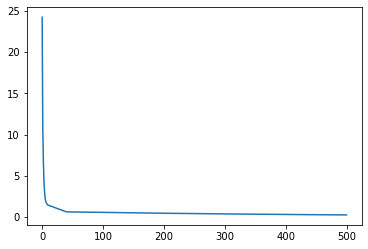

In [11]:
plt.plot(losses)
# print(losses)

In [12]:
print('w:',w)
print('b:',b)

w: [[0.68660065]
 [0.22983385]]
b: 0.10400000000000004


(-10.231411985451054, -2.4484013442637584)

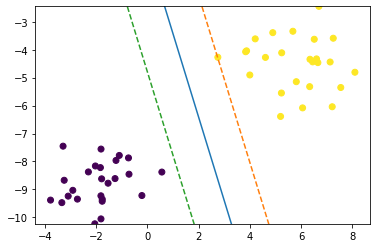

In [13]:
x0_1 = np.min(X[:,0])
x0_2 = np.max(X[:,0])
plt.scatter(X[:,0],X[:,1],marker='o', c=y)  

x1_1 = get_hyperplane_value(x0_1, w[0], w[1], b, 0)
x1_2 = get_hyperplane_value(x0_2, w[0], w[1], b, 0) 
plt.plot([x0_1, x0_2],[x1_1, x1_2] )

x1_1 = get_hyperplane_value(x0_1, w[0], w[1], b, 1)
x1_2 = get_hyperplane_value(x0_2, w[0], w[1], b, 1) 
plt.plot([x0_1, x0_2],[x1_1, x1_2], linestyle='--' )


x1_1 = get_hyperplane_value(x0_1, w[0], w[1], b, -1)
x1_2 = get_hyperplane_value(x0_2, w[0], w[1], b, -1) 
plt.plot([x0_1, x0_2],[x1_1, x1_2], linestyle='--' )


plt.ylim(np.min(X[:,1]), np.max(X[:,1]))

In [14]:
def plot_decision_boundary(X, y, w, b):
        plt.scatter(X[:, 0], X[:, 1], c=y, s=50  )
        ax = plt.gca()
        xlim = ax.get_xlim()
        ylim = ax.get_ylim()
 
        # create grid to evaluate model
        xx = np.linspace(xlim[0], xlim[1], 30)
        yy = np.linspace(ylim[0], ylim[1], 30)
        YY, XX = np.meshgrid(yy, xx)
        xy = np.vstack([XX.ravel(), YY.ravel()]).T
        zz= xy @ w + b
        Z = zz.reshape(XX.shape)
 
        # plot decision boundary and margins
        ax.contour(XX, YY, Z, colors=['r', 'b', 'r'], levels=[-1, 0, 1], alpha=0.5,
                   linestyles=['--', '-', '--'], linewidths=[2.0, 2.0, 2.0])
        plt.show()

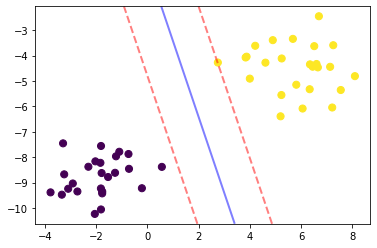

In [15]:
plot_decision_boundary(X,y,w,b)

<b>Train on a modified data</b>

In [16]:
X3=np.array([[ 7.12731332, -4.4394424 ],
       [ 6.68873898, -2.44840134],
       [ 3.99337867, -4.90451269],
       [ 4.20397723, -3.61164749],
       [ 5.19327641, -6.38845134],
       [ 7.54287406, -5.35284052],
       [ 4.88954545, -3.38947816],
       [ 5.22597752, -5.5503347 ],
       [ 6.64886376, -4.46203664],
       [ 8.09408178, -4.8068287 ],
       [ 6.32916529, -5.32177094],
       [ 5.80670214, -5.14475233],
       [ 5.67381136, -3.33963413],
       [ 7.20870152, -6.04176429],
       [ 6.50753753, -3.62561777],
       [ 4.60302933, -4.27563422],
       [ 3.83024448, -4.07271978],
       [ 6.05297048, -6.08234237],
       [ 3.86649969, -4.04019832],
       [ 6.44492377, -4.43550613],
       [ 5.23730283, -4.11095128],
       [ 6.34072331, -4.34259999],
       [ 6.59620916, -4.32893984],
       [ 7.24901124, -3.58913263],
       [-1.1004791 , -1.78436803],
       [-1.8171622 , -3.22909875],
       [-2.05521901, -4.23141199],
       [-0.21804625, -3.21962706],
       [-1.83682056, -2.21952131],
       [-1.76558632, -3.34943001],
       [-3.25014567, -2.67304842],
       [-1.22856371, -1.96317275],
       [-3.29446134, -1.45269997],
       [-1.81294631, -1.55640734],
       [-1.53809058, -2.77828137],
       [-3.78288052, -3.38303174],
       [-2.73473836, -3.34777956],
       [-0.74123127, -1.87270877],
       [-1.78948268, -2.62182811],
       [-1.26561532, -2.61262708],
       [-0.72123914, -2.45607028],
       [-3.34179681, -3.47382989],
       [-2.91411681, -3.03305688],
       [-1.81467949, -4.05599013],
       [-1.76772086, -3.42358002],
       [-2.30635421, -2.37456353],
       [-3.09442079, -3.2409609 ],
       [-2.03285195, -2.16158771]])

In [17]:
y3=np.array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1.])

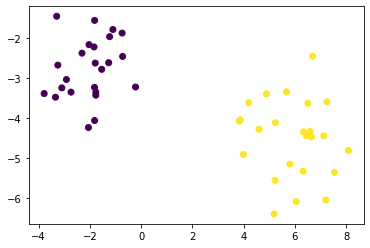

In [18]:
plt.scatter(X3[:,0], X3[:,1] , c=y3)

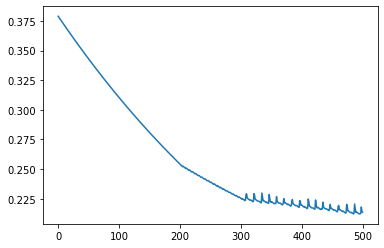

In [19]:
X=X3
y=y3

losses=[]
learning_rate=0.001    
y=y.reshape(-1, 1)
C=1
w=np.random.rand(X.shape[1]).reshape(-1,1)
b=0
for epoch in range(500):
    z=X @ w + b
    loss=0.5* w.T@w + C * np.sum( np.maximum(0, 1-y*z)  )
    losses.append(loss[0][0])
    
    miss = np.where(y*z < 1)[0]
    dw = w -  ( C * np.sum( y[miss] * X[miss]  , axis=0) ).reshape(-1,1)
    db = -C*np.sum( y[miss])
     
    w=w-learning_rate*dw
    b=b-learning_rate*db
    
plt.plot(losses)

(-6.38845134, -1.45269997)

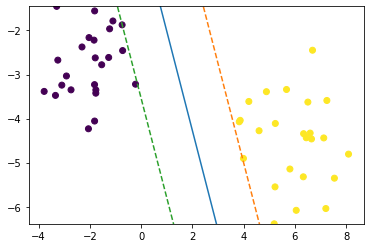

In [20]:
x0_1 = np.min(X[:,0])
x0_2 = np.max(X[:,0])
plt.scatter(X[:,0],X[:,1],marker='o', c=y)  

x1_1 = get_hyperplane_value(x0_1, w[0], w[1], b, 0)
x1_2 = get_hyperplane_value(x0_2, w[0], w[1], b, 0) 
plt.plot([x0_1, x0_2],[x1_1, x1_2] )

x1_1 = get_hyperplane_value(x0_1, w[0], w[1], b, 1)
x1_2 = get_hyperplane_value(x0_2, w[0], w[1], b, 1) 
plt.plot([x0_1, x0_2],[x1_1, x1_2], linestyle='--' )


x1_1 = get_hyperplane_value(x0_1, w[0], w[1], b, -1)
x1_2 = get_hyperplane_value(x0_2, w[0], w[1], b, -1) 
plt.plot([x0_1, x0_2],[x1_1, x1_2], linestyle='--' )


plt.ylim(np.min(X[:,1]), np.max(X[:,1]))

<b>Observation: hyperplane on both the data a similar pattern. [?]</b>